In [1]:
import pandas as pd 
import numpy as np 
from datetime import datetime
import os
import matplotlib.pyplot as plt

In [2]:
def delete_files():
    os.system("rm -r datasets/*.csv")
    os.system("rm -r datasets/*.xlsx")

def unzip_files(zip_file):
    os.system(f"unzip datasets/{zip_file}  -d datasets")

unzip_files(zip_file="stock_data.zip")


Archive:  datasets/stock_data.zip
  inflating: datasets/5_stocks.csv   
  inflating: datasets/apple_google.csv  
  inflating: datasets/asset_classes.csv  
  inflating: datasets/components.csv  
  inflating: datasets/debt_unemployment.csv  
  inflating: datasets/djia.csv       
  inflating: datasets/djia2.csv      
  inflating: datasets/dow_jones.csv  
  inflating: datasets/fb.csv         
  inflating: datasets/gdp_growth.csv  
  inflating: datasets/goog_fb.csv    
  inflating: datasets/google.csv     
  inflating: datasets/index.csv      
  inflating: datasets/listings.xlsx  
  inflating: datasets/market_cap_series.csv  
  inflating: datasets/msft_aapl.csv  
  inflating: datasets/nyse.csv       
  inflating: datasets/random_walk.csv  
  inflating: datasets/sp500.csv      
  inflating: datasets/stock_data.csv  
  inflating: datasets/stocks_4.csv   
  inflating: datasets/tickers.csv    
  inflating: datasets/unrate.csv     
  inflating: datasets/unrate_2000.csv  
  inflating: datasets/ya

In [3]:
df = pd.read_csv("datasets/google.csv", parse_dates=["Date"], index_col="Date")

delete_files()

df.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


The script calculates daily, monthly, and annual returns for stock prices using the pandas pct_change() function. Specifically, it computes percentage changes of the closing prices (Close) for intervals of 1 day (daily_return), 30 days (monthly_return), and 360 days (annual_return), each multiplied by 100 to express the returns as percentages.

In [4]:
df['daily_return'] = df.Close.pct_change().mul(100)

/tmp/ipykernel_47616/2526604402.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['daily_return'] = df.Close.pct_change().mul(100)


In [32]:
# Create monthly_return
df['monthly_return'] = df.Close.pct_change(30).mul(100)

/tmp/ipykernel_45759/859269883.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['monthly_return'] = df.Close.pct_change(30).mul(100)


In [33]:
# Create annual_return
df['annual_return'] = df.Close.pct_change(360).mul(100)

/tmp/ipykernel_45759/3516622162.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['annual_return'] = df.Close.pct_change(360).mul(100)


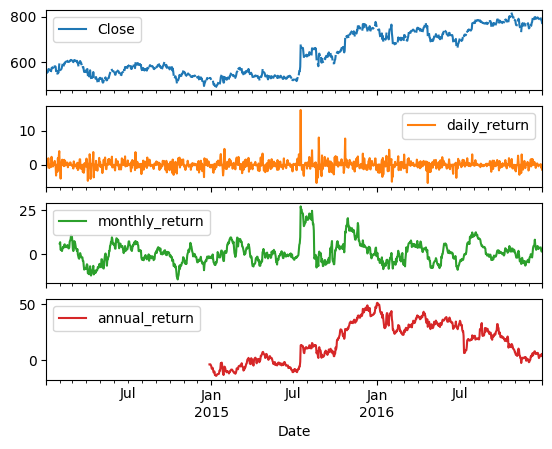

In [34]:
df.plot(subplots=True)

# Display the plots
plt.show()


The plots illustrate Google's stock prices from 2014 to 2016, alongside calculated daily, monthly, and annual percentage returns. The stock price ("Close") exhibits a generally upward trend with moderate volatility. Daily returns are mostly stable, fluctuating around zero with occasional spikes reflecting significant one-day changes. Monthly returns reveal smoother fluctuations, highlighting more distinct periods of positive and negative performance over a monthly scale. The annual returns plot shows a broader and clearer cyclical trend, indicating periods of higher annualized growth followed by declining returns, capturing the longer-term dynamics in Google's stock performance during this period.